In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datatset/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['target','id','date','flag','user','text'],index_col=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df['target'].unique()

array([0, 4])

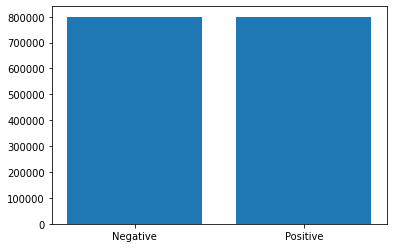

In [6]:
# converting to positive and negative
classes=df.target.unique()
counts=[]
for i in classes:
  count=len(df[df.target == i])
  counts.append(count)
plt.bar(['Negative','Positive'],counts)
plt.show()

In [7]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# for stop words
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.drop(['text'],axis=1,inplace=True)

In [9]:
# for @ re post
import re

def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
df['text_without_stopwords'] = df['text_without_stopwords'].apply(remove_usernames_links)

In [10]:
# for special character 
df['text_without_stopwords'] = df['text_without_stopwords'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\(\)\{\}\[\]\+\%\!\/]", '')

<ipython-input-10-5e760d7bfe59>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_without_stopwords'] = df['text_without_stopwords'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\(\)\{\}\[\]\+\%\!\/]", '')


In [11]:
# for url
df["text_without_stopwords"] = df["text_without_stopwords"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()

<ipython-input-11-1a8834e5727c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text_without_stopwords"] = df["text_without_stopwords"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()


In [12]:
# lower case
df['text_without_stopwords'] = df['text_without_stopwords'].str.lower() 

In [13]:
for i in range(50):
  print(df['text_without_stopwords'][i])

awww thats bummer you shoulda got david carr third day it d
upset cant update facebook texting it might cry result school today also blah
i dived many times ball managed save 50 the rest go bounds
whole body feels itchy like fire
no behaving all im mad here i cant see there
whole crew
need hug
hey long time see yes rains bit only bit lol  im fine thanks  hows
nope
que muera
spring break plain city snowing
i repierced ears
i bear watch it and i thought ua loss embarrassing
it counts idk i either never talk anymore
wouldve first gun really though zac snyders doucheclown
i wish i got watch you i miss  premiere
hollis death scene hurt severely watch film wry directors cut now
file taxes
ahh ive always wanted see rent love soundtrack
oh dear were drinking forgotten table drinks
day get much done
one friend called me asked meet mid valley todaybut ive time sigh
i baked cake i ated
week going hoped
blagh class 8 tomorrow
i hate i call wake people
just going cry sleep watching marley me
im sad

In [18]:
# steming
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()
def work(word):
  word=Lemmatizer.lemmatize(word)
  return word
df['text_without_stopwords']=df['text_without_stopwords'].apply(work)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [19]:
for i in range(50):
  print(df['text_without_stopwords'][i])

awww thats bummer you shoulda got david carr third day it d
upset cant update facebook texting it might cry result school today also blah
i dived many times ball managed save 50 the rest go bounds
whole body feels itchy like fire
no behaving all im mad here i cant see there
whole crew
need hug
hey long time see yes rains bit only bit lol  im fine thanks  hows
nope
que muera
spring break plain city snowing
i repierced ears
i bear watch it and i thought ua loss embarrassing
it counts idk i either never talk anymore
wouldve first gun really though zac snyders doucheclown
i wish i got watch you i miss  premiere
hollis death scene hurt severely watch film wry directors cut now
file taxes
ahh ive always wanted see rent love soundtrack
oh dear were drinking forgotten table drinks
day get much done
one friend called me asked meet mid valley todaybut ive time sigh
i baked cake i ated
week going hoped
blagh class 8 tomorrow
i hate i call wake people
just going cry sleep watching marley me
im sad

In [28]:
# splitting dataset

from sklearn.model_selection import train_test_split
x=df.text_without_stopwords.values
y=df.target.values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=57)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(xtrain)
xtrain=vectorizer.transform(xtrain)
xtest=vectorizer.transform(xtest)

In [30]:
# Making model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred=lr_model.predict(xtest)
prdiction_train=lr_model.predict(xtrain)

In [32]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(ytrain,prdiction_train)
print("Accuracy for Train",accuracy1*100)

Accuracy for Train 81.03776785714287


In [33]:
accuracy2 = accuracy_score(ytest,pred)
print("Accuracy for Test",accuracy2*100)

Accuracy for Test 77.99145833333333


In [34]:
# Done